In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime as dt
import seaborn as sns

In [2]:
# Study data files
death_data_path = "data/DeathsByState.csv"

# Read the data and the study results
death_data = pd.read_csv(death_data_path)

death_data.head()

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2/8/2023,United States,2020,1,1/4/2020,60176.0,55009.0,843.0,11569.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/8/2023,United States,2020,2,1/11/2020,60744.0,55760.0,861.0,11963.0,1942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/8/2023,United States,2020,3,1/18/2020,59363.0,54516.0,829.0,11701.0,1819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2023,United States,2020,4,1/25/2020,59162.0,54401.0,828.0,11879.0,1864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/8/2023,United States,2020,5,2/1/2020,58834.0,54001.0,811.0,11963.0,1828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#death_data.info

In [4]:
death_data.columns

Index(['Data As Of', 'Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'fl

In [5]:
# d_cause = death_data["Jurisdiction of Occurrence"].value_counts()
# d_cause 

In [6]:
reduced_df = death_data.drop(['Data As Of','flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'flag_otherunk', 'flag_hd', 'flag_stroke', 'flag_cov19mcod',
       'flag_cov19ucod'], axis = 1)



In [7]:
filtered_df = reduced_df.loc[reduced_df["Jurisdiction of Occurrence"]!="United States"]
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
161,Alabama,2020,1,1/4/2020,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0
162,Alabama,2020,2,1/11/2020,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0
163,Alabama,2020,3,1/18/2020,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0
164,Alabama,2020,4,1/25/2020,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0
165,Alabama,2020,5,2/1/2020,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,Puerto Rico,2022,52,12/31/2022,688.0,664.0,14.0,90.0,48.0,59.0,22.0,24.0,NaN,34.0,19.0,127.0,17.0,34.0,32.0
8690,Puerto Rico,2023,1,1/7/2023,648.0,622.0,14.0,89.0,42.0,57.0,16.0,18.0,NaN,27.0,24.0,149.0,20.0,34.0,31.0
8691,Puerto Rico,2023,2,1/14/2023,649.0,642.0,18.0,97.0,75.0,54.0,20.0,25.0,13.0,25.0,26.0,117.0,15.0,35.0,26.0
8692,Puerto Rico,2023,3,1/21/2023,474.0,474.0,15.0,43.0,43.0,28.0,16.0,15.0,NaN,29.0,21.0,109.0,17.0,26.0,21.0


In [8]:
filtered_df.dtypes

Jurisdiction of Occurrence                                                                            object
MMWR Year                                                                                              int64
MMWR Week                                                                                              int64
Week Ending Date                                                                                      object
All Cause                                                                                            float64
Natural Cause                                                                                        float64
Septicemia (A40-A41)                                                                                 float64
Malignant neoplasms (C00-C97)                                                                        float64
Diabetes mellitus (E10-E14)                                                                          float64
Alzheimer disease (

In [9]:
# Change date dtype from object to datetime 
filtered_df['Week Ending Date'] = pd.to_datetime(filtered_df['Week Ending Date'])
filtered_df['MMWR Year'] = pd.to_datetime(filtered_df['MMWR Year'])

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
filtered_df.dtypes

Jurisdiction of Occurrence                                                                                   object
MMWR Year                                                                                            datetime64[ns]
MMWR Week                                                                                                     int64
Week Ending Date                                                                                     datetime64[ns]
All Cause                                                                                                   float64
Natural Cause                                                                                               float64
Septicemia (A40-A41)                                                                                        float64
Malignant neoplasms (C00-C97)                                                                               float64
Diabetes mellitus (E10-E14)                                             

In [11]:
# Extract month by month name
filtered_df['Month'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).month
filtered_df['MMWR Year'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).year
            

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Extract month by month name
filtered_df['Month'] = filtered_df['Week Ending Date'].dt.strftime('%B')
filtered_df.head()

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Month
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February


In [13]:
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Month
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,Puerto Rico,2022,52,2022-12-31,688.0,664.0,14.0,90.0,48.0,59.0,22.0,24.0,NaN,34.0,19.0,127.0,17.0,34.0,32.0,December
8690,Puerto Rico,2023,1,2023-01-07,648.0,622.0,14.0,89.0,42.0,57.0,16.0,18.0,NaN,27.0,24.0,149.0,20.0,34.0,31.0,January
8691,Puerto Rico,2023,2,2023-01-14,649.0,642.0,18.0,97.0,75.0,54.0,20.0,25.0,13.0,25.0,26.0,117.0,15.0,35.0,26.0,January
8692,Puerto Rico,2023,3,2023-01-21,474.0,474.0,15.0,43.0,43.0,28.0,16.0,15.0,NaN,29.0,21.0,109.0,17.0,26.0,21.0,January


In [14]:
filtered_df.columns

# df = filtered_df[ "MMWR Year"].value_counts()
# df

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'Month'],
      dtype='object')

In [15]:
# Rename columns for readability
renamed_df = filtered_df.rename(columns={'Jurisdiction of Occurrence':'State', 'MMWR Year': 'Year', 'MMWR Week':'Week', 'Week Ending Date': 'Date',
                                         'Septicemia (A40-A41)':'Septicemia (Blood Poisoning/ Infection)', 'Malignant neoplasms (C00-C97)':'Cancer',
                                         'Diabetes mellitus (E10-E14)': 'Diabetes', 'Alzheimer disease (G30)':'Alzheimer Diseases', 
                                         'Influenza and pneumonia (J09-J18)':'Influenza & Pneumonia', 'Chronic lower respiratory diseases (J40-J47)':'Chronic Lower Respiratory Diseases', 
                                         'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other Diseases of Respiratory System',
                                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Unclassified',
                                         'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Kidney Disease', 'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart Diseases',
                                         'Cerebrovascular diseases (I60-I69)': 'Cerebrovascular Diseases', 'COVID-19 (U071, Multiple Cause of Death)':'COVID-19 (Multiple Cause of Death)',
                                         'COVID-19 (U071, Underlying Cause of Death)':'COVID-19 (Underlying Cause of Death)'
                                        })
renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Month
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February


In [16]:
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'Month'],
      dtype='object')

In [17]:
# Sum covid cases in one column, Respiratory Diseases, Cerebrovascular diseases and heart diseases
# choose causes you want to focus on
renamed_df['Respiratory Diseases'] = renamed_df['Chronic Lower Respiratory Diseases'] + renamed_df['Other Diseases of Respiratory System']
renamed_df['All Heart Diseases'] = renamed_df['Heart Diseases'] + renamed_df['Cerebrovascular Diseases']
renamed_df['COVID-19'] = renamed_df['COVID-19 (Multiple Cause of Death)'] + renamed_df['COVID-19 (Underlying Cause of Death)']

renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,...,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Month,Respiratory Diseases,All Heart Diseases,COVID-19
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,25.0,25.0,268.0,81.0,0.0,0.0,January,99.0,349.0,0.0
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,23.0,34.0,274.0,68.0,0.0,0.0,January,92.0,342.0,0.0
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,23.0,24.0,239.0,45.0,0.0,0.0,January,94.0,284.0,0.0
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,14.0,23.0,284.0,70.0,NaN,0.0,January,72.0,354.0,NaN
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,20.0,23.0,265.0,55.0,0.0,0.0,February,93.0,320.0,0.0


In [18]:
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'Month', 'Respiratory Diseases',
       'All Heart Diseases', 'COVID-19'],
      dtype='object')

In [19]:
# Reorder Columns
reordered_df = renamed_df[['State', 'Date','Month','Year', 'Week',  'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Respiratory Diseases','Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases', 'All Heart Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'COVID-19']]

In [20]:
reordered_df = reordered_df.reset_index(drop = True)
reordered_df

,State,Date,Month,Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,1,1082.0,1009.0,15.0,196.0,25.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2,1127.0,1060.0,25.0,197.0,17.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,3,1039.0,976.0,28.0,201.0,24.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,4,1056.0,982.0,16.0,190.0,23.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,NaN,0.0,NaN
4,Alabama,2020-02-01,February,2020,5,1026.0,949.0,15.0,157.0,16.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Puerto Rico,2022-12-31,December,2022,52,688.0,664.0,14.0,90.0,48.0,...,NaN,NaN,34.0,19.0,127.0,17.0,144.0,34.0,32.0,66.0
8529,Puerto Rico,2023-01-07,January,2023,1,648.0,622.0,14.0,89.0,42.0,...,NaN,NaN,27.0,24.0,149.0,20.0,169.0,34.0,31.0,65.0
8530,Puerto Rico,2023-01-14,January,2023,2,649.0,642.0,18.0,97.0,75.0,...,13.0,38.0,25.0,26.0,117.0,15.0,132.0,35.0,26.0,61.0
8531,Puerto Rico,2023-01-21,January,2023,3,474.0,474.0,15.0,43.0,43.0,...,NaN,NaN,29.0,21.0,109.0,17.0,126.0,26.0,21.0,47.0


In [21]:
# Identify incomplete rows
reordered_df.count()

State                                      8533
Date                                       8533
Month                                      8533
Year                                       8533
Week                                       8533
All Cause                                  8533
Natural Cause                              8533
Septicemia (Blood Poisoning/ Infection)    4858
Cancer                                     8526
Diabetes                                   6678
Alzheimer Diseases                         7104
Influenza & Pneumonia                      5053
Chronic Lower Respiratory Diseases         7277
Other Diseases of Respiratory System       5024
Respiratory Diseases                       4806
Kidney Disease                             5433
Unclassified                               4823
Heart Diseases                             8527
Cerebrovascular Diseases                   7337
All Heart Diseases                         7337
COVID-19 (Multiple Cause of Death)      

In [22]:
# # there are NaN values replace them with 0
# # Fill NAs with 0
clean_df = reordered_df.fillna({'Septicemia (Blood Poisoning/ Infection)': 0, 
                            'Cancer': 0, 
                            'Diabetes': 0,
                            'Alzheimer Diseases': 0,
                            'Influenza & Pneumonia': 0,
                            'Chronic Lower Respiratory Diseases': 0,
                            'Other Diseases of Respiratory System': 0,
                            'Respiratory Diseases': 0,
                            'Kidney Disease': 0,
                            'Unclassified': 0,
                            'Heart Diseases': 0,
                            'Cerebrovascular Diseases': 0,
                            'All Heart Diseases': 0,
                            'COVID-19 (Multiple Cause of Death)': 0,
                            'COVID-19 (Underlying Cause of Death)': 0,
                            'COVID-19':0 })
clean_df.head()

,State,Date,Month,Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,1,1082.0,1009.0,15.0,196.0,25.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2,1127.0,1060.0,25.0,197.0,17.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,3,1039.0,976.0,28.0,201.0,24.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,4,1056.0,982.0,16.0,190.0,23.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,0.0,0.0,0.0
4,Alabama,2020-02-01,February,2020,5,1026.0,949.0,15.0,157.0,16.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0


In [23]:
# verify counts
clean_df.count()

State                                      8533
Date                                       8533
Month                                      8533
Year                                       8533
Week                                       8533
All Cause                                  8533
Natural Cause                              8533
Septicemia (Blood Poisoning/ Infection)    8533
Cancer                                     8533
Diabetes                                   8533
Alzheimer Diseases                         8533
Influenza & Pneumonia                      8533
Chronic Lower Respiratory Diseases         8533
Other Diseases of Respiratory System       8533
Respiratory Diseases                       8533
Kidney Disease                             8533
Unclassified                               8533
Heart Diseases                             8533
Cerebrovascular Diseases                   8533
All Heart Diseases                         8533
COVID-19 (Multiple Cause of Death)      

In [24]:
#clean_df.dtypes
clean_df.columns

Index(['State', 'Date', 'Month', 'Year', 'Week', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 'Heart Diseases',
       'Cerebrovascular Diseases', 'All Heart Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'COVID-19'],
      dtype='object')

# Summary Statistics

In [25]:
#clean_df.describe()

In [26]:
# Deaths by Year


death_by_year_df = clean_df.groupby(["Year"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_year_df = death_by_year_df.round().astype(int)
death_by_year_df


,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Year,,,,,,,,,,,,
2020,3385843,3099433,35546,604927,101474,133429,49646,168939,48506,27697,845251,703401
2021,3503278,3187194,37092,609515,103579,119668,37180,161195,50582,29544,848848,895175
2022,3364674,3079499,38436,622547,102052,122426,42859,171907,55710,69364,867411,445517
2023,209969,207468,2654,40200,6054,8760,4372,12513,3620,13673,55918,18580


In [27]:
# Highest death "All Cause" by year
death_by_year_df.sort_values('All Cause',ascending=False).head()


,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Year,,,,,,,,,,,,
2021,3503278,3187194,37092,609515,103579,119668,37180,161195,50582,29544,848848,895175
2020,3385843,3099433,35546,604927,101474,133429,49646,168939,48506,27697,845251,703401
2022,3364674,3079499,38436,622547,102052,122426,42859,171907,55710,69364,867411,445517
2023,209969,207468,2654,40200,6054,8760,4372,12513,3620,13673,55918,18580


In [28]:
All_death_by_year_df = death_by_year_df["All Cause"]
All_death_by_year_df

Year
2020    3385843
2021    3503278
2022    3364674
2023     209969
Name: All Cause, dtype: int32

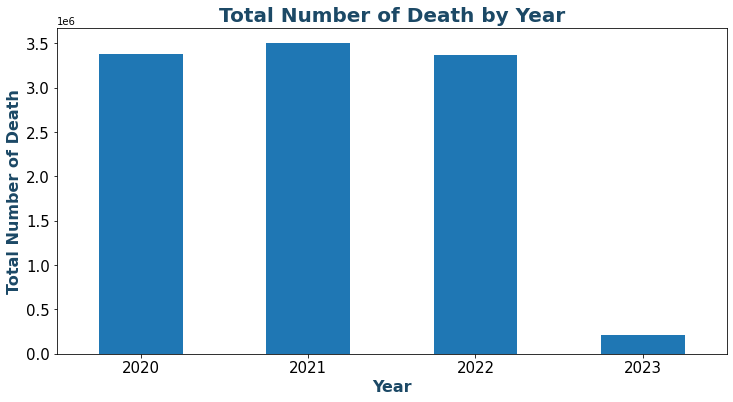

In [56]:
# Plot bar chart 

plt.figure(figsize=(12,6))
All_death_by_year_df.plot(kind ="bar",  rot = 0, align="center", fontsize = 15)

plt.xlabel("Year", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.title("Total Number of Death by Year", fontsize = 20, color = "#1c4966", fontweight="bold")


plt.show()

In [30]:
# Deaths by Month


death_by_month_df = clean_df.groupby(["Month"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_df = death_by_month_df.round().astype(int)

death_by_month_df.sort_values('All Cause',ascending=False).head(12)

,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Month,,,,,,,,,,,,
January,1293800,1212571,13652,206662,37747,47616,20064,63911,19543,22218,311955,416500
October,956007,872712,10727,176810,28363,35314,10251,45330,14309,14573,238296,166328
December,945303,884300,10316,154155,27949,34619,15456,47043,13891,23730,228565,263430
February,883056,810804,9663,152869,26505,33126,13385,45207,13992,7132,223584,193084
May,854373,772984,8825,160112,25811,31265,9526,42566,12749,7326,216403,133908
July,842263,756334,9394,162707,25560,30738,8521,40799,12864,9470,216862,94524
April,836887,763968,8794,149748,25636,30211,11370,41540,12722,7437,212986,158423
August,831527,753867,8786,153107,24399,29877,8223,38457,11955,9630,203372,170836
November,804158,740607,8939,142382,24114,29960,10044,39375,12056,15480,199093,162770


In [57]:
# # Deaths by state


# death_by_state_df = clean_df.groupby(["State"]).sum()[['All Cause', 'Natural Cause',
#        'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
#        'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
#        'Kidney Disease', 'Unclassified', 
#        'All Heart Diseases', 'COVID-19']]

# death_by_state_df = death_by_state_df.round().astype(int)
# death_by_state_df

In [32]:
# Highest death "All Cause" by state
top_10_state = death_by_state_df.sort_values('All Cause',ascending=False).head(10)
top_10_state = top_10_state['All Cause']
top_10_state

State
California        989277
Texas             785105
Florida           768412
Pennsylvania      471564
Ohio              437974
Illinois          378162
New York          356744
North Carolina    348810
Michigan          347221
Georgia           323395
Name: All Cause, dtype: int32

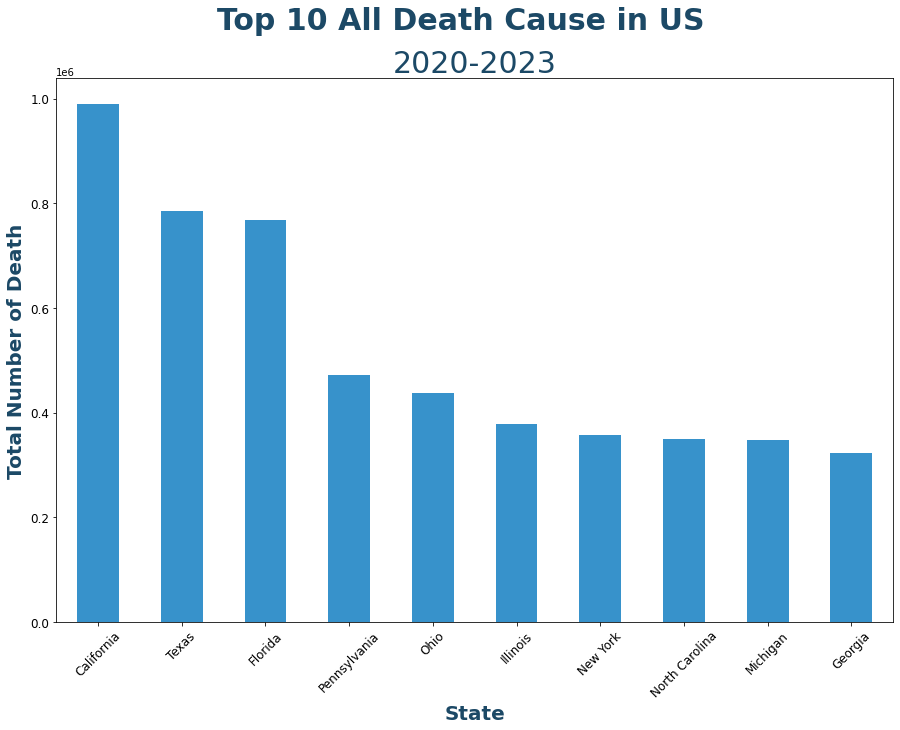

In [52]:
# Plot bar chart 
plt.figure(figsize=(15,10))
top_10_state.plot(kind ="bar", color = "#3792cb", rot = 45, align="center", fontsize = 12)

plt.xlabel("State", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.suptitle("Top 10 All Death Cause in US",fontsize=30, color = "#1c4966", fontweight="bold")
plt.title("2020-2023", fontsize = 30, color = "#1c4966")


plt.show()

In [34]:
death_by_3_years_df = clean_df.loc[clean_df["Year"]!=2023]
death_by_3_years_df.head()

,State,Date,Month,Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,1,1082.0,1009.0,15.0,196.0,25.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2,1127.0,1060.0,25.0,197.0,17.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,3,1039.0,976.0,28.0,201.0,24.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,4,1056.0,982.0,16.0,190.0,23.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,0.0,0.0,0.0
4,Alabama,2020-02-01,February,2020,5,1026.0,949.0,15.0,157.0,16.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0


In [36]:
#total_all_cause = clean_df["All Cause"].groupby(clean_df["Year"]).sum()
total_all_cause = clean_df[(clean_df["Year"]== 2021)].groupby(["Year"]).sum()["All Cause"]
total_all_cause

Year
2021    3503278.0
Name: All Cause, dtype: float64

In [41]:
# top_10_states = pd.DataFrame(clean_df.head(10))
# top_10_states